In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_excel('covid19_dataset.xlsx', 'raw_data', skiprows=[0]).values

In [3]:
dataset

array([[1, Timestamp('2020-01-01 00:00:00'), 0, ..., 0, nan, nan],
       [2, Timestamp('2020-01-02 00:00:00'), 0, ..., 0, nan, nan],
       [3, Timestamp('2020-01-03 00:00:00'), 0, ..., 0, nan, nan],
       ...,
       [237, Timestamp('2020-08-24 00:00:00'), 4686, ..., 2200000, nan,
        nan],
       [238, Timestamp('2020-08-25 00:00:00'), 2965, ..., 2256197, nan,
        nan],
       [239, Timestamp('2020-08-26 00:00:00'), 5277, ..., 2500000, nan,
        nan]], dtype=object)

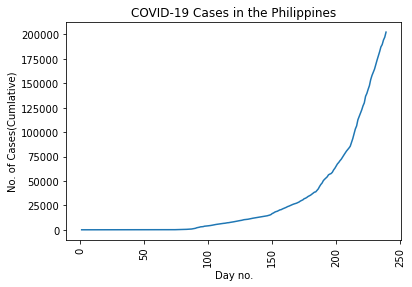

In [4]:
data = dataset[:,0].reshape(-1,1)
target = dataset[:,3].reshape(-1,1)

from matplotlib import pyplot as plt

plt.plot(data,target)
plt.xlabel('Day no.')
plt.ylabel('No. of Cases(Cumlative)')
plt.title('COVID-19 Cases in the Philippines')
plt.xticks(rotation=90)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias=False)
data_new = poly.fit_transform(data)

In [6]:
from sklearn.linear_model import LinearRegression

algorithm = LinearRegression()
algorithm.fit(data_new,target)

print('Coefficients:',algorithm.coef_)
print('Intercept:',algorithm.intercept_)

Coefficients: [[-6.83646559e+02  1.63192397e+01 -1.33624233e-01  3.83993997e-04]]
Intercept: [6320.87229838]


In [7]:
from sklearn.metrics import r2_score

predicted_target=algorithm.predict(data_new)

print('r2 score:',r2_score(target,predicted_target))

r2 score: 0.9971587317760957


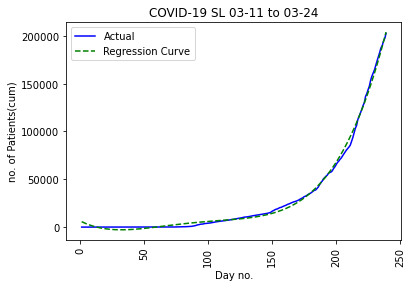

In [8]:
plt.plot(data, target,'b',label='Actual')
plt.plot(data, predicted_target,'g--',label='Regression Curve')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 SL 03-11 to 03-24')
plt.xticks(rotation=90)
plt.show()

In [9]:
test_data = np.arange(240, 300).reshape(-1,1)
test_data_new = poly.fit_transform(test_data)

In [10]:
forecasted_target = algorithm.predict(test_data_new)

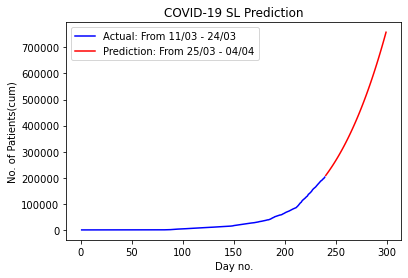

In [11]:
plt.plot(data, target,'b',label='Actual: From 11/03 - 24/03')
plt.plot(test_data, forecasted_target,'r',label='Prediction: From 25/03 - 04/04')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('No. of Patients(cum)')
plt.title('COVID-19 SL Prediction')
plt.show()

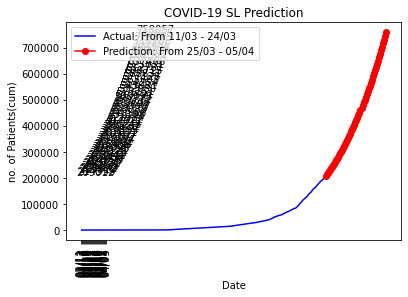

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

Dates=pd.date_range(start="2020-03-11",end="2020-04-05").strftime('%m/%d')

plt.plot(data, target, 'b', label='Actual: From 11/03 - 24/03')
plt.plot(test_data, forecasted_target, 'r-o', label='Prediction: From 25/03 - 05/04')
plt.legend()
plt.xlabel('Date')
plt.ylabel('no. of Patients(cum)')
plt.xticks(range(0,len(Dates),1), Dates)
plt.xticks(rotation=90)
plt.title('COVID-19 SL Prediction')

for i, v in enumerate(forecasted_target.reshape((forecasted_target.shape[0]*forecasted_target.shape[1]))):
    ax.text(i+14, v+25, "%d" %v, ha="center")

plt.savefig('Prediction.png')
plt.show()